In [3]:
import numpy as np
import pandas as pd
import dask.dataframe as dd
import sqlite3
from sqlalchemy import create_engine
import matplotlib.pyplot as plt
%matplotlib inline

In [4]:
file = 'data-short.csv'
bigfile='Hackathon_data_final.csv'

data = pd.read_csv(bigfile, sep="\t", nrows=2)
##df = dd.read_csv(file, sep="\t")

In [5]:
data_columns = data [['BillTo', 'QuantityShipped', 'ItemPrice', 'ItemCost', 'InvoiceDate']]
##df_columns = df [['BillTo', 'QuantityShipped', 'ItemPrice', 'ItemCost', 'InvoiceDate']]

In [6]:
data

,TransactionID,Entity,BillTo,ShipTo,SalesPlan,OrderSourceCode,OrderType,ItemNumber,InvoiceNumber,InvoiceDate,...,FreightApplies,PromoCode,DiscountAmount,PaymentTerms,PaymentTermsDesc,AvgDaysLatePayment,CreditLiimit,SpecialtyCode,PhysicianCount,CustomerStartDate
0,20181101194177811000,P107545,B107545,287605,DFT68MPH,I,C,7093218709,19427488,2018-11-01,...,N,NaN,0.0,STM,Statement date + 24 days,0,0,OBGYN,1,20081017
1,20181101194181071000,P602089,B602089,602089,DFT68MPH,W,C,9004971900,19427814,2018-11-01,...,N,NaN,0.0,STM,Statement date + 24 days,-25,15001,OBGYN,3,20081017


In [9]:
csv_db = create_engine('sqlite:///csv_database.db')

In [11]:
chunksize=1000000
i=0
j=0

for df in pd.read_csv(bigfile,sep="\t", chunksize=chunksize, iterator=True):
    df = df.rename(columns = {c: c.replace(' ','') for c in df.columns})
    df.index += j
    
    df.to_sql('data_use', csv_db, if_exists='append')
    j = df.index[-1]+1
    print('| index: {}'.format(j))

| index: 1000000
| index: 3000000
| index: 6000000
| index: 10000000
| index: 15000000
| index: 21000000
| index: 28000000
| index: 36000000
| index: 45000000
| index: 55000000
| index: 66000000
| index: 78000000
| index: 91000000
| index: 105000000
| index: 120000000
| index: 136000000
| index: 153000000
| index: 171000000
| index: 190000000
| index: 210000000
| index: 231000000
| index: 253000000
| index: 276000000
| index: 300000000
| index: 325000000
| index: 351000000
| index: 378000000
| index: 406000000
| index: 435000000
| index: 465000000
| index: 496000000
| index: 528000000
| index: 561000000
| index: 595000000
| index: 630000000
| index: 666000000
| index: 703000000
| index: 741000000
| index: 780000000
| index: 820000000
| index: 861000000
| index: 903000000
| index: 946000000
| index: 990000000
| index: 1034733504


In [12]:
df.columns

Index(['TransactionID', 'Entity', 'BillTo', 'ShipTo', 'SalesPlan',
       'OrderSourceCode', 'OrderType', 'ItemNumber', 'InvoiceNumber',
       'InvoiceDate', 'QuantityShipped', 'ItemPrice', 'ItemCost', 'TeleRepID',
       'FieldRepID', 'TeleRepName', 'FieldRepName', 'FreightApplies',
       'PromoCode', 'DiscountAmount', 'PaymentTerms', 'PaymentTermsDesc',
       'AvgDaysLatePayment', 'CreditLiimit', 'SpecialtyCode', 'PhysicianCount',
       'CustomerStartDate'],
      dtype='object')

In [14]:
data_credit = pd.read_sql_query('SELECT COUNT(OrderType) FROM data_use WHERE OrderType="C"', csv_db)

In [15]:
data_credit

,COUNT(OrderType)
0,1293243


In [16]:
data_credit_none = pd.read_sql_query('SELECT COUNT(OrderType) FROM data_use WHERE OrderType="S"', csv_db)

In [17]:
data_credit_none

,COUNT(OrderType)
0,91173765


([<matplotlib.axis.XTick at 0x1c754c6dca0>,
 [Text(0, 0, 'Credit'), Text(1, 0, 'No Credit')])

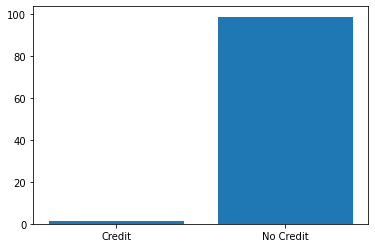

In [33]:
x = np.arange(2)
data_credit = data_credit/(data_credit+data_credit_none)
data_credit_none = data_credit_none/(data_credit+data_credit_none)
plt.bar(x, height=[data_credit.values[0][0]*100,data_credit_none.values[0][0]*100])
plt.xticks(x, ['Credit','No Credit'])


In [143]:
pd.read_sql_query('SELECT QuantityShipped,InvoiceDate, BillTo, ItemPrice FROM data_use WHERE BillTo="B1064183" AND InvoiceDate LIKE "%2018%" OR "%2021%"', csv_db)

,QuantityShipped,InvoiceDate,BillTo,ItemPrice
0,2,2018-11-08,B1064183,1.60
1,2,2018-11-12,B1064183,1.60
2,1,2018-11-12,B1064183,21.26
3,2,2018-11-19,B1064183,11.33
4,1,2018-11-19,B1064183,15.34
...,...,...,...,...
307,1,2018-11-26,B1064183,19.27
308,10,2018-11-26,B1064183,4.96
309,10,2018-11-26,B1064183,4.96
310,2,2018-12-18,B1064183,4.25


In [134]:
dataUser1 = data2[data2.BillTo == "B253855"]
dataUser2 = data2[data2.BillTo == 'B1064183']

([<matplotlib.axis.XTick at 0x1c70862aee0>], [Text(0, 0, '')])

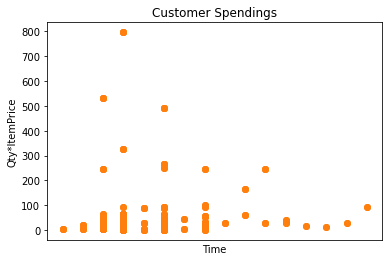

In [142]:
plt.plot(dataUser1.InvoiceDate, dataUser1.trustFactor)
plt.plot(dataUser2.InvoiceDate, dataUser2.trustFactor, 'o')
plt.xlabel('Year')
plt.title('Customer Spendings')
plt.ylabel('Qty*ItemPrice')
plt.xlabel('Time')
plt.xticks("2021")

In [144]:
ds1 = pd.read_sql_query('SELECT BillTo FROM data_use WHERE InvoiceDate LIKE "%2018%"', csv_db)

,BillTo
0,B107545
1,B602089
2,B669486
3,B912352
4,B912352
...,...
7516743,B1337476
7516744,B1337476
7516745,B1337476
7516746,B1337476


In [ ]:
ds2 = pd.read_sql_query('SELECT BillTo FROM data_use WHERE InvoiceDate LIKE "%2019%"', csv_db)

In [ ]:
ds3 = pd.read_sql_query('SELECT BillTo FROM data_use WHERE InvoiceDate LIKE "%2020%"', csv_db)

In [ ]:
ds4 = pd.read_sql_query('SELECT BillTo FROM data_use WHERE InvoiceDate LIKE "%2021%"', csv_db)